## Confidence Interval

In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
sns.set(rc={'figure.figsize': (13,7.5)})

In [5]:
np.random.seed(42)

normal_distribution_male_mass_pound = np.random.normal(loc = 181, scale = 24, size = 6000)

In [6]:
normal_distribution_male_mass_pound

array([192.92113967, 177.68165677, 196.54452491, ..., 151.78230896,
       192.23081013, 152.91326305])

In [9]:
normal_distribution_female_mass_pound = np.random.normal(loc = 132, scale = 22, size = 6500)

normal_distribution_female_mass_pound

array([137.83235608, 121.86848473, 124.55989223, ..., 138.59627021,
       136.41847645, 131.72651025])

In [11]:
all_mass_value = np.concatenate((normal_distribution_female_mass_pound, normal_distribution_male_mass_pound), axis=0)

In [18]:
df_ppl_mass = pd. DataFrame(data={'mass_pounds': all_mass_value})

In [19]:
df_ppl_mass

,mass_pounds
0,137.832356
1,121.868485
2,124.559892
3,119.327446
4,174.179710
...,...
12495,185.115264
12496,208.663554
12497,151.782309
12498,192.230810


In [14]:
df_ppl_mass.head()

,mass_pound
0,137.832356
1,121.868485
2,124.559892
3,119.327446
4,174.179710


Text(0.5, 1.015, 'Distribution of Mass People')

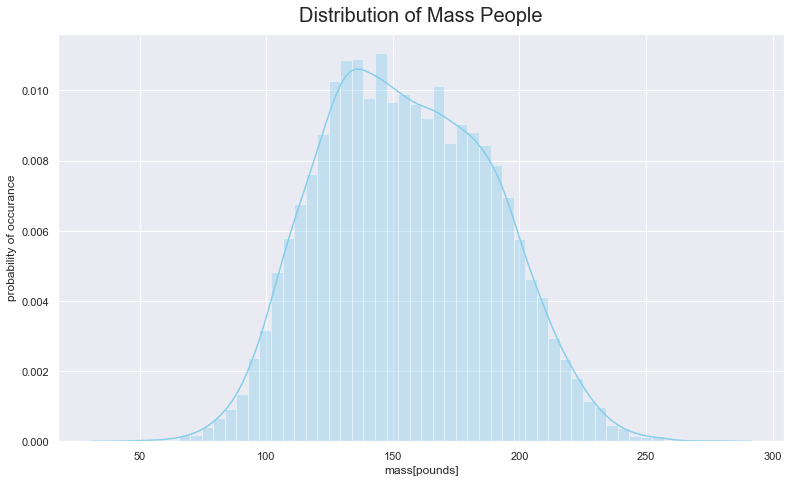

In [32]:
sns.distplot(df_ppl_mass['mass_pounds'], color = 'skyblue')
plt.xlabel('mass[pounds]')
plt.ylabel('probability of occurance')
plt.title('Distribution of Mass People', y=1.015, fontsize=20)

In [23]:
# Calculate Populate Mean 

pop_mean_mass = df_ppl_mass['mass_pounds'].mean()

pop_mean_mass

155.35348887271473

In [24]:
#Calculate Population Standard Deviation

pop_std_dev_mass = df_ppl_mass['mass_pounds'].std()

pop_std_dev_mass

33.51423337188086

In [27]:
# Sample 25 people, 300x sample

sample_means = []
n = 25

for sample in range(0,300):
    #random sampling
    sample_values = np.random.choice(a = df_ppl_mass['mass_pounds'], size = n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)
    
    
    

In [28]:
sample_means

[167.19741354672973,
 154.64175704181926,
 154.18255755611136,
 156.96521205963208,
 161.35877676572485,
 165.98550865025183,
 150.25080409402423,
 162.40234580440915,
 152.2044984501944,
 150.15217655744746,
 145.10159290750073,
 159.5383253971839,
 169.29391071800381,
 154.87608764229608,
 157.7481320257785,
 148.36216005162294,
 154.06853064121935,
 158.90222525580947,
 152.7127421922445,
 153.09642424615376,
 161.8476253001398,
 166.23913881667795,
 150.45035960969145,
 154.84010223862765,
 144.38681869864132,
 155.68473062887742,
 144.02015378101282,
 156.8610730091438,
 153.45168231281065,
 157.4977351568546,
 144.01005988174168,
 159.00568959377526,
 152.7682421439741,
 156.33964754029452,
 146.24973846347578,
 140.44099602736776,
 156.49731909468142,
 156.37724503110806,
 156.1146270616378,
 141.25926197131238,
 144.93541879557148,
 159.40350879774925,
 156.20251403780225,
 137.10316693023262,
 153.2426223450186,
 156.52016666161325,
 144.6808478015801,
 156.30848795826688,
 15

Text(0, 0.5, 'frequency of occurance')

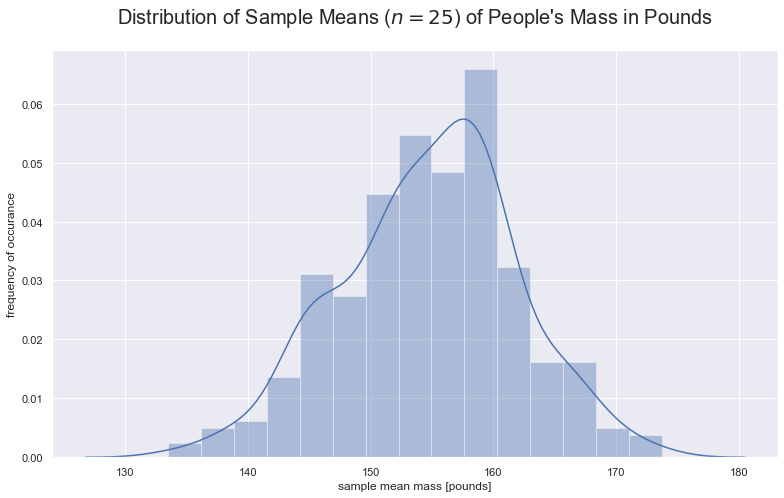

In [43]:
sns.distplot(sample_means)
plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.05, fontsize = 20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurance')
          

In [40]:
#Calculate Sample Means

mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

154.76006927001472

In [41]:
#Calculate Std Dev of Sample Means

std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

7.130362363752237

In [44]:
#Calculate Std Error

standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.702846674376173

In [45]:
gym_sample_mean = 163

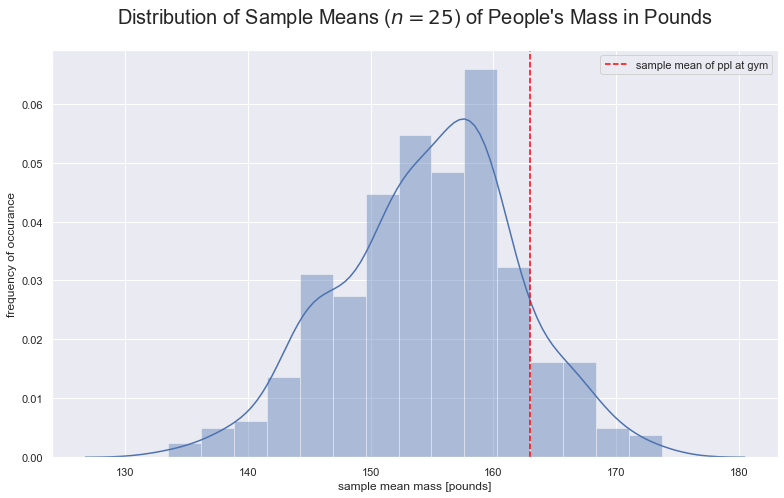

In [50]:
#Visualize gym sample means to sampling distribution

sns.distplot(sample_means)

plt.axvline(x = gym_sample_mean, linestyle='--', label='sample mean of ppl at gym', c='red')

plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.05, fontsize = 20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurance')

plt.legend()
plt.show()

In [51]:
lower_CI = mean_of_sample_means - 1.96*standard_error

In [52]:
upper_CI = mean_of_sample_means + 1.96*standard_error

In [53]:
print(lower_CI)
print(upper_CI)

141.62248978823743
167.89764875179202


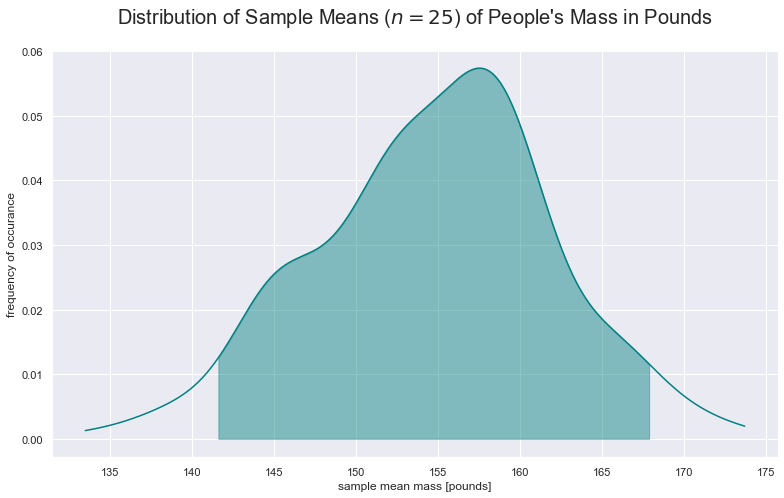

In [63]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 1000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_CI, upper_CI, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')

plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.05, fontsize = 20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurance')

plt.show()

## Probability Distribution

## 1. Uniform

In [65]:
from scipy.stats import uniform


In [67]:
n=10000
start=10
width=10
data_uniform=uniform.rvs(size=n, loc=start, scale=width)

Text(0, 0.5, 'Frequency')

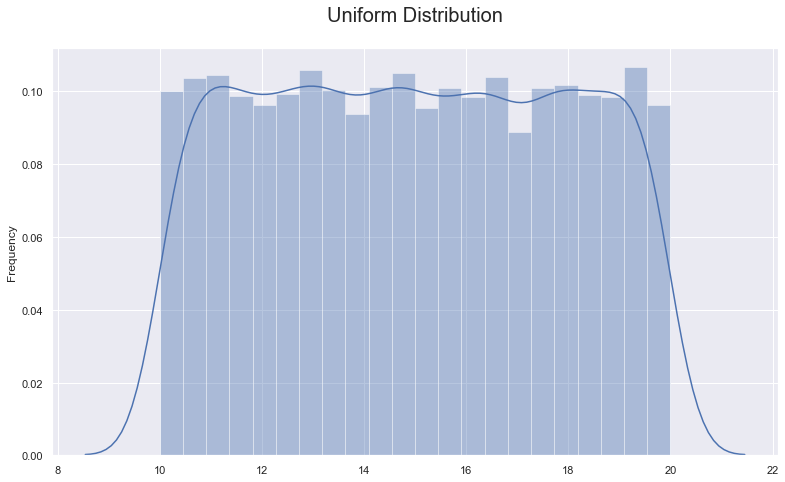

In [80]:
sns.distplot(data_uniform)
plt.title('Uniform Distribution', y=1.05, fontsize = 20)
plt.ylabel('Frequency', y=0.5)

## 2. Bernoulli

In [77]:
from scipy.stats import bernoulli
data_bern=bernoulli.rvs(size=10000, p=0.6)

Text(0, 0.5, 'Frequency')

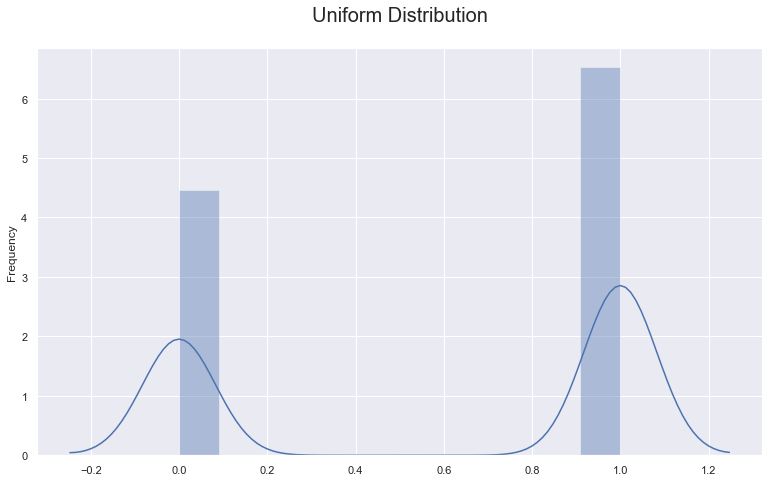

In [79]:
sns.distplot(data_bern)
plt.title('Uniform Distribution', y=1.05, fontsize = 20)
plt.ylabel('Frequency', y=0.5)

## 3. Binominal

In [84]:
from scipy.stats import binom
data_binom = binom.rvs(n=10, size=10000, p=0.8)

Text(0, 0.5, 'Frequency')

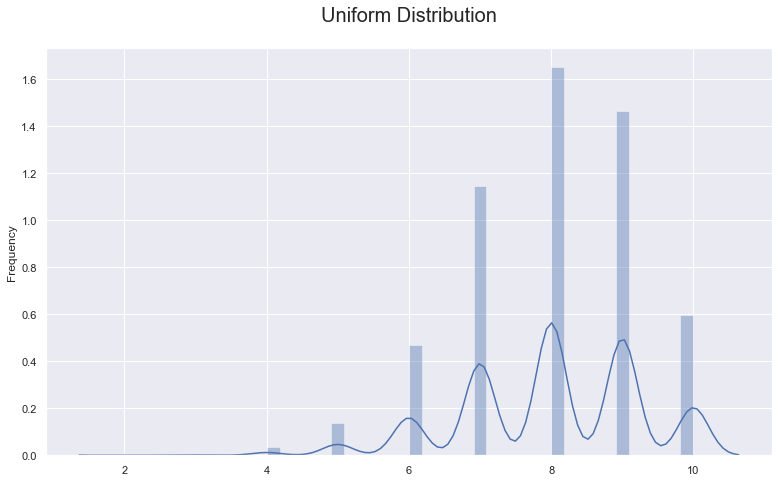

In [85]:
sns.distplot(data_binom)
plt.title('Uniform Distribution', y=1.05, fontsize = 20)
plt.ylabel('Frequency', y=0.5)

## 4. Poisson

In [86]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

Text(0, 0.5, 'Frequency')

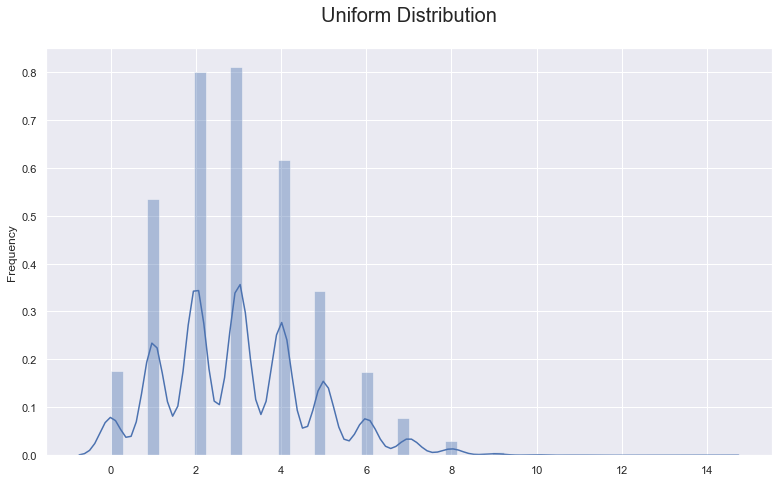

In [88]:
sns.distplot(data_poisson)
plt.title('Uniform Distribution', y=1.05, fontsize = 20)
plt.ylabel('Frequency', y=0.5)

## 5. Normal 


In [96]:
from scipy.stats import norm
data_normal=norm.rvs(size=10000, loc=0, scale =1)

Text(0, 0.5, 'Frequency')

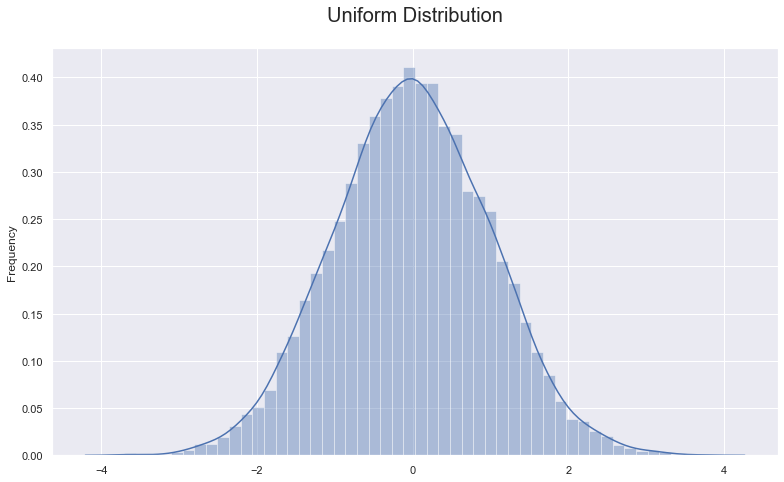

In [97]:
sns.distplot(data_normal)
plt.title('Uniform Distribution', y=1.05, fontsize = 20)
plt.ylabel('Frequency', y=0.5)

## 6. Exponential

In [92]:
from scipy.stats import expon
data_expon=expon.rvs(scale=1, loc=0, size=10000)


Text(0, 0.5, 'Frequency')

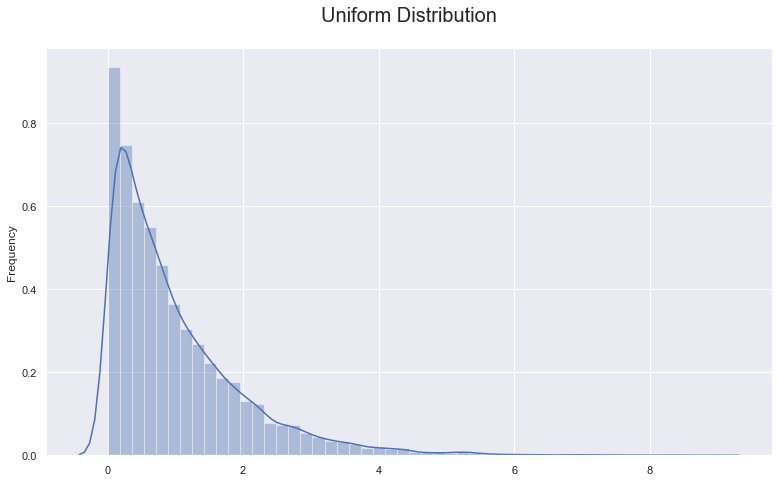

In [93]:
sns.distplot(data_expon)
plt.title('Uniform Distribution', y=1.05, fontsize = 20)
plt.ylabel('Frequency', y=0.5)

In [109]:
import statsmodels.api as sm

In [98]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [99]:
females = da[
    da['RIAGENDR'] == 2
]

males = da[
    da['RIAGENDR'] == 1 
]

In [101]:
n1 = len(females)
mu1 = females['BMXBMI'].mean()
sd1 = females['BMXBMI'].std()

(n1,mu1,sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [102]:
n2 = len(males)
mu2 = males['BMXBMI'].mean()
sd2 = males['BMXBMI'].std()

(n2,mu2,sd2)

(2759, 28.778072111846985, 6.252567616801485)

In [113]:
sm.stats.ztest(females["BMXBMI"].dropna(), males["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

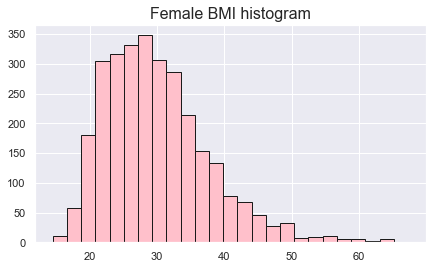

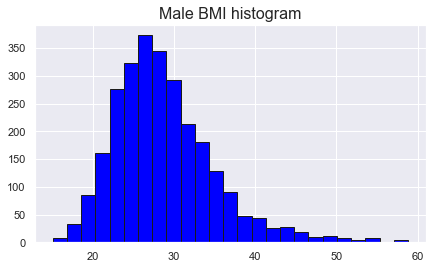

In [114]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(males["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()